#**Cleaning Data and Loading Data**



##**Handlig Null values**

###**Clean step 1:Removing columns if their null>50%**

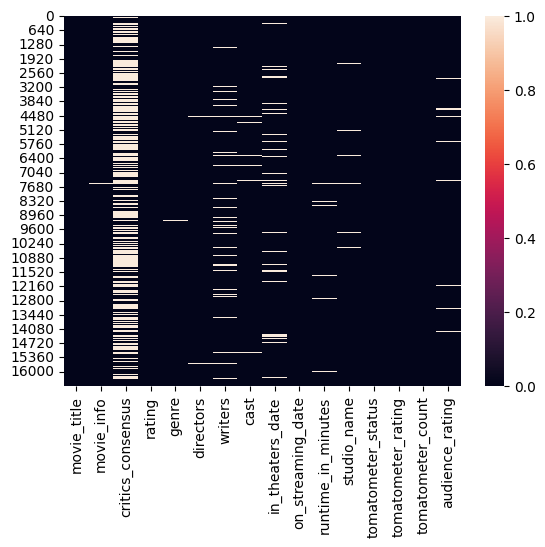

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://raw.githubusercontent.com/MN3425/Data/refs/heads/main/Rotten_Tomatoes_Movies3_csv.csv')
sns.heatmap(dataset.isnull())
plt.show()

In [2]:
dataset.isnull().sum()


,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [3]:
dataset.shape

(16638, 16)

**Since critics_consensus	count = (8329/16638)*100 = 50.0601 %
total null is more than 50% so we will remove this column.**

In [4]:
dataset.drop(columns=["critics_consensus"],inplace =True)

###**Clean step 2: Putting categorical/ string data as mode in object datatypes in NULL cells**

In [5]:
#selecting categorical datatypes to fill with mode values
#Before
dataset.select_dtypes(include="object").isnull().sum()

,0
movie_title,0
movie_info,24
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2
studio_name,416


In [6]:

# Fill missing values in categorical columns with mode
for i in dataset.select_dtypes(include="object").columns:
    if not dataset[i].mode().empty:  # Check if mode exists
        mode_value = dataset[i].mode()[0]  # Get the mode
        dataset[i] = dataset[i].fillna(mode_value)  # Assign modified column back


In [7]:
#Checking if filled with mode
#After
dataset.select_dtypes(include="object").isnull().sum()

,0
movie_title,0
movie_info,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0
studio_name,0


###**Clean step 3: Putting numerical data as mode in numerical datatypes in NULL cells**

In [8]:
#checking how many null values are ther in numerical columns
dataset.select_dtypes(include="float64").isnull().sum()

,0
runtime_in_minutes,155
audience_rating,252


In [9]:
#selecting all numerical columns
dataset.select_dtypes(include="float64").columns

Index(['runtime_in_minutes', 'audience_rating'], dtype='object')

In [10]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Selecting numerical columns
num_cols = dataset.select_dtypes(include="float64").columns

# Filling missing values in numerical columns with the mean
si = SimpleImputer(strategy="mean")
imputed_values = si.fit_transform(dataset[num_cols])

# Assigning the imputed values back to the dataset
dataset[num_cols] = pd.DataFrame(imputed_values, columns=num_cols)


In [11]:
#checking data is filled or not
dataset[num_cols].isnull().sum()

,0
runtime_in_minutes,0
audience_rating,0


###**After removing Dataset**

In [12]:
dataset

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NR,"Action & Adventure, Art House & International,...",Alfred Hitchcock,Woody Allen,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,Paramount Pictures,Fresh,95,21,91.0


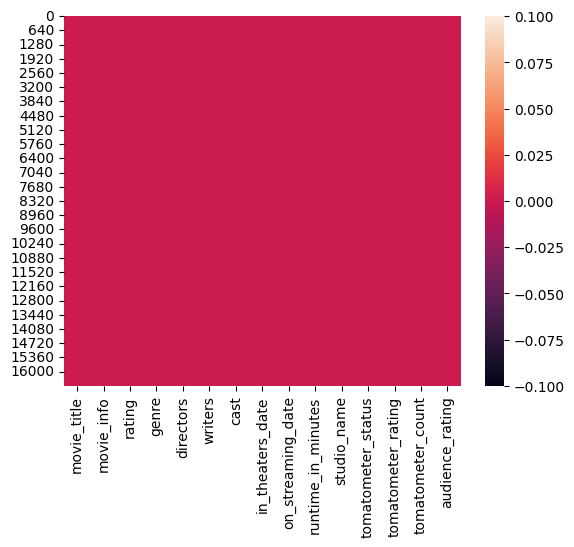

In [13]:
sns.heatmap(dataset.isnull())
plt.show()

In [14]:
dataset.isnull().sum()

,0
movie_title,0
movie_info,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0
runtime_in_minutes,0


##**Encoding**

###**Label Encoding**

**TOMATOMETER AND STUDIO NAME**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'studio_name' and 'tomatometer_status' and etc columns
dataset['studio_name'] = label_encoder.fit_transform(dataset['studio_name'])
dataset['movie_title'] = label_encoder.fit_transform(dataset['movie_title'])
dataset['directors'] = label_encoder.fit_transform(dataset['directors'])
dataset['writers'] = label_encoder.fit_transform(dataset['writers'])
dataset['tomatometer_status'] = label_encoder.fit_transform(dataset['tomatometer_status'])

dataset

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,9212,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",1329,2321,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,6,2,49,144,53.0
1,9364,Kate has a lot on her mind. There's the ethics...,R,Comedy,5911,8700,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,2318,0,86,140,64.0
2,18,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",886,1285,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,2752,1,68,22,53.0
3,46,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",7281,9576,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,650,0,100,51,97.0
4,96,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",6584,3358,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,718,1,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",4973,7349,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,1521,2,56,9,74.0
16634,16088,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy",1135,5143,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,2740,0,97,279,92.0
16635,16089,If ever there was a role that Anthony Quinn wa...,NR,"Action & Adventure, Art House & International,...",296,11994,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,1007,1,78,9,87.0
16636,16090,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama",1615,2352,"Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,1918,1,95,21,91.0


###**Cardinal Encoding**

**Rating column**

In [16]:
rating_mapping = {
    "G": 0,
    "PG": 1,
    "PG-13": 2,
    "PG-13)": 2,
    "R": 3,
    "R)": 3,
    "NC17": 4,
    "NR": 5
}


dataset['rating'] = dataset['rating'].map(rating_mapping)

dataset

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,9212,A teenager discovers he's the descendant of a ...,1,"Action & Adventure, Comedy, Drama, Science Fic...",1329,2321,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,6,2,49,144,53.0
1,9364,Kate has a lot on her mind. There's the ethics...,3,Comedy,5911,8700,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,2318,0,86,140,64.0
2,18,Blake Edwards' 10 stars Dudley Moore as George...,3,"Comedy, Romance",886,1285,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,2752,1,68,22,53.0
3,46,"A Puerto Rican youth is on trial for murder, a...",5,"Classics, Drama",7281,9576,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,650,0,100,51,97.0
4,96,"This 1954 Disney version of Jules Verne's 20,0...",0,"Action & Adventure, Drama, Kids & Family",6584,3358,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,718,1,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,"Based on a 1940s Los Angeles murder trial, thi...",3,"Drama, Musical & Performing Arts",4973,7349,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,1521,2,56,9,74.0
16634,16088,The modern mammal metropolis of Zootopia is a ...,1,"Action & Adventure, Animation, Comedy",1135,5143,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,2740,0,97,279,92.0
16635,16089,If ever there was a role that Anthony Quinn wa...,5,"Action & Adventure, Art House & International,...",296,11994,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,1007,1,78,9,87.0
16636,16090,"Filmed on a grand scale, Zulu is a rousing rec...",1,"Classics, Drama",1615,2352,"Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,1918,1,95,21,91.0


###**Multi hot encoding of Genre, cast**

In [17]:
# Step 1: Split genres into lists
dataset['genre_list'] = dataset['genre'].str.split(', ')

# Step 2: Get all unique genres
unique_genres = set(genre for sublist in dataset['genre_list'] for genre in sublist)

# Step 3: Create a multi-hot encoded string for each row (single column)
dataset['encoded_genre'] = dataset['genre_list'].apply(
    lambda x: ''.join([str(1) if genre in x else str(0) for genre in unique_genres])
)
# Step 4: Replace the original 'genre' column with the encoded genre string
dataset = dataset.drop(columns=['genre_list'])

dataset['genre'] = dataset['encoded_genre']
dataset = dataset.drop(columns=['encoded_genre'])

dataset

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,9212,A teenager discovers he's the descendant of a ...,1,000001000000001010010,1329,2321,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,6,2,49,144,53.0
1,9364,Kate has a lot on her mind. There's the ethics...,3,000000000000001000000,5911,8700,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,2318,0,86,140,64.0
2,18,Blake Edwards' 10 stars Dudley Moore as George...,3,000000000000001001000,886,1285,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,2752,1,68,22,53.0
3,46,"A Puerto Rican youth is on trial for murder, a...",5,010000000000000000010,7281,9576,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,650,0,100,51,97.0
4,96,"This 1954 Disney version of Jules Verne's 20,0...",0,000001000001000000010,6584,3358,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,718,1,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,"Based on a 1940s Los Angeles murder trial, thi...",3,100000000000000000010,4973,7349,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,5/27/2003,104.0,1521,2,56,9,74.0
16634,16088,The modern mammal metropolis of Zootopia is a ...,1,000001100000001000000,1135,5143,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",3/4/2016,6/7/2016,108.0,2740,0,97,279,92.0
16635,16089,If ever there was a role that Anthony Quinn wa...,5,010001000000100000010,296,11994,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,8/3/2004,142.0,1007,1,78,9,87.0
16636,16090,"Filmed on a grand scale, Zulu is a rousing rec...",1,010000000000000000010,1615,2352,"Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,2/2/2001,139.0,1918,1,95,21,91.0


In [18]:
# Remove a column by name
dataset = dataset.drop(columns=['movie_info'])
#dataset = dataset.drop(columns=['cast'])

dataset = dataset.drop(columns=['in_theaters_date'])
dataset = dataset.drop(columns=['on_streaming_date'])
dataset

,movie_title,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,9212,1,000001000000001010010,1329,2321,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,6,2,49,144,53.0
1,9364,3,000000000000001000000,5911,8700,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,2318,0,86,140,64.0
2,18,3,000000000000001001000,886,1285,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,2752,1,68,22,53.0
3,46,5,010000000000000000010,7281,9576,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,650,0,100,51,97.0
4,96,0,000001000001000000010,6584,3358,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,718,1,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,3,100000000000000000010,4973,7349,"Daniel Valdez, Edward James Olmos, Charles Aid...",104.0,1521,2,56,9,74.0
16634,16088,1,000001100000001000000,1135,5143,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",108.0,2740,0,97,279,92.0
16635,16089,5,010001000000100000010,296,11994,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",142.0,1007,1,78,9,87.0
16636,16090,1,010000000000000000010,1615,2352,"Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",139.0,1918,1,95,21,91.0


###**Cast encoding(more than 16000 unique values) so using vector**

In [19]:
from gensim.models import Word2Vec
import numpy as np
df = dataset

# Prepare tokens (splitting cast names into lists)
df["cast_tokens"] = df["cast"].apply(lambda x: x.split(', '))

# Train Word2Vec Model
w2v_model = Word2Vec(sentences=df["cast_tokens"], vector_size=100, window=5, min_count=1)

# Average embeddings for each movie's cast
def get_average_embedding(cast_list, model):
    return np.mean([model.wv[actor] for actor in cast_list if actor in model.wv], axis=0)

# Compute the Euclidean norm for each movie's cast embedding
def get_norm(embedding):
    return np.linalg.norm(embedding)

# Apply to each row in the DataFrame
df["cast_embedding"] = df["cast_tokens"].apply(lambda x: get_average_embedding(x, w2v_model))
df["cast_embedding_norm"] = df["cast_embedding"].apply(get_norm)

# Now drop unnecessary columns
df["cast"] = df["cast_embedding_norm"]
df.drop("cast_embedding", axis=1, inplace=True)
df.drop("cast_tokens", axis=1, inplace=True)

#print(df.head())


#**Data Loading**


In [20]:
import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/MN3425/Data/refs/heads/main/Rotten_Tomatoes_Movies3_csv.csv')
df = dataset
df

,movie_title,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,cast_embedding_norm
0,9212,1,000001000000001010010,1329,2321,0.006266,83.0,6,2,49,144,53.0,0.006266
1,9364,3,000000000000001000000,5911,8700,0.022742,90.0,2318,0,86,140,64.0,0.022742
2,18,3,000000000000001001000,886,1285,0.008313,118.0,2752,1,68,22,53.0,0.008313
3,46,5,010000000000000000010,7281,9576,0.015162,95.0,650,0,100,51,97.0,0.015162
4,96,0,000001000001000000010,6584,3358,0.015163,127.0,718,1,89,27,74.0,0.015163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,3,100000000000000000010,4973,7349,0.007955,104.0,1521,2,56,9,74.0,0.007955
16634,16088,1,000001100000001000000,1135,5143,0.010142,108.0,2740,0,97,279,92.0,0.010142
16635,16089,5,010001000000100000010,296,11994,0.017658,142.0,1007,1,78,9,87.0,0.017658
16636,16090,1,010000000000000000010,1615,2352,0.010332,139.0,1918,1,95,21,91.0,0.010332


*italicized text*#**Data preparation for Model**

##Data separation as X and Y


In [21]:
y = df['audience_rating']
y

,audience_rating
0,53.0
1,64.0
2,53.0
3,97.0
4,74.0
...,...
16633,74.0
16634,92.0
16635,87.0
16636,91.0


*Removing audience_rating column from the main table*

In [22]:
x = df.drop('audience_rating', axis = 1)
x

,movie_title,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,cast_embedding_norm
0,9212,1,000001000000001010010,1329,2321,0.006266,83.0,6,2,49,144,0.006266
1,9364,3,000000000000001000000,5911,8700,0.022742,90.0,2318,0,86,140,0.022742
2,18,3,000000000000001001000,886,1285,0.008313,118.0,2752,1,68,22,0.008313
3,46,5,010000000000000000010,7281,9576,0.015162,95.0,650,0,100,51,0.015162
4,96,0,000001000001000000010,6584,3358,0.015163,127.0,718,1,89,27,0.015163
...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16087,3,100000000000000000010,4973,7349,0.007955,104.0,1521,2,56,9,0.007955
16634,16088,1,000001100000001000000,1135,5143,0.010142,108.0,2740,0,97,279,0.010142
16635,16089,5,010001000000100000010,296,11994,0.017658,142.0,1007,1,78,9,0.017658
16636,16090,1,010000000000000000010,1615,2352,0.010332,139.0,1918,1,95,21,0.010332


##Data splitting(train and test)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state= 100)

x_train

,movie_title,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,cast_embedding_norm
11196,9319,3,000000000000000110010,3340,4954,0.010505,84.000000,600,2,6,17,0.010505
12973,14182,3,000000000000100000010,5940,8741,0.009436,81.000000,2199,0,93,151,0.009436
12792,10855,3,000000000000001001010,4737,1635,0.011537,106.000000,2772,2,39,28,0.011537
1354,11413,3,000000000000001001010,2982,4380,0.012947,89.000000,2219,2,5,79,0.012947
3845,2160,3,000000000010110000000,5235,7728,0.011064,148.000000,1727,2,42,74,0.011064
...,...,...,...,...,...,...,...,...,...,...,...,...
16304,15781,0,000001000001000000010,7463,11994,0.010325,89.000000,1918,1,73,11,0.010325
79,10740,3,000000000000101010010,566,793,0.012427,96.000000,2378,2,25,40,0.012427
12119,10212,5,010001000000000000010,319,4491,0.010291,109.000000,2101,1,100,10,0.010291
14147,12660,2,000000000000001000000,4790,7080,0.020164,94.000000,2561,1,70,23,0.020164


In [24]:
x_test

,movie_title,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,cast_embedding_norm
7603,5824,3,000000010000100000010,6137,9050,0.018708,120.000000,2109,2,55,22,0.018708
11673,9777,3,000001000010000000010,2584,6488,0.017824,102.391494,2584,2,45,282,0.017824
8126,6369,3,000000000010000001000,4683,10565,0.025010,150.000000,6,2,0,6,0.025010
14880,14151,5,001000010000000000000,7764,11355,0.057803,75.000000,983,1,67,12,0.057803
16469,15929,5,000000000010000100010,1887,10780,0.015680,95.000000,1223,2,59,22,0.015680
...,...,...,...,...,...,...,...,...,...,...,...,...
1157,8996,3,000001000010001001010,7514,10427,0.009845,120.000000,2640,0,93,89,0.009845
13948,12286,3,000000000000001100000,3797,5604,0.011206,103.000000,995,2,56,270,0.011206
13386,11448,3,000000000000000000010,1287,1881,0.011622,124.000000,2424,1,68,187,0.011622
13183,11244,3,000001000010000000010,1834,5099,0.008764,109.000000,14,2,36,152,0.008764


#**Model Building**

##**Training the Model using data in Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

#sns.heatmap(df.isnull())
#plt.show()


LinearRegression()

##**Applying the model to make a prediction**

In [26]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [27]:
y_lr_train_pred

array([59.60556445, 59.60556445, 59.60556445, ..., 60.83745941,
       59.60556445, 59.60556445])

In [28]:
y_lr_test_pred

array([59.60556568, 59.60568763, 59.60556445, ..., 59.60556445,
       59.60568763, 59.60556445])

#**Evaluate Model Performance**

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [32]:
print("Linear Regression - Training MSE:", lr_train_mse)
print("Linear Regression - Training R^2:", lr_train_r2)
print("Linear Regression - Testing MSE:", lr_test_mse)
print("Linear Regression - Testing R^2:", lr_test_r2)

Linear Regression - Training MSE: 404.9335582104452
Linear Regression - Training R^2: 0.02120644476711775
Linear Regression - Testing MSE: 396.22255959411643
Linear Regression - Testing R^2: 0.026194966945395914
